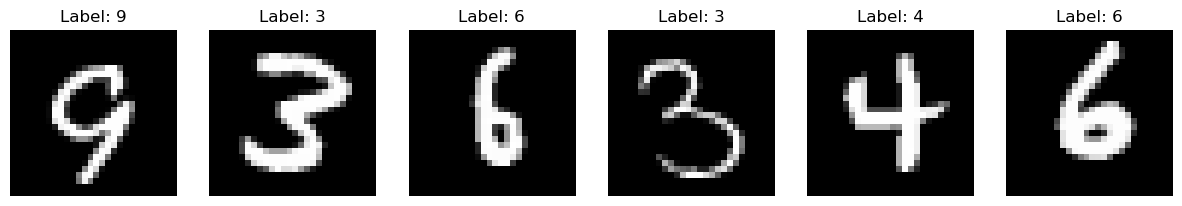

Epoch [1/5], Loss: 0.0252


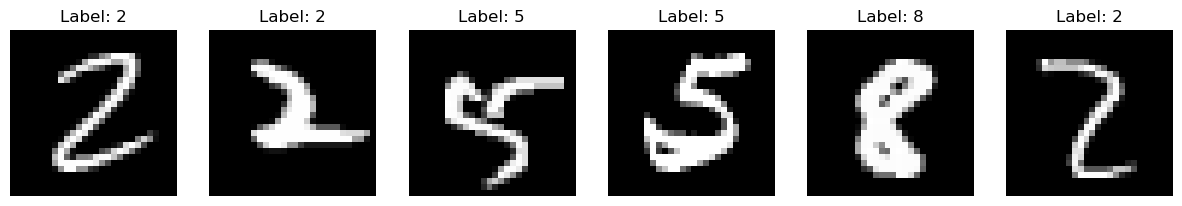

Epoch [2/5], Loss: 0.0113


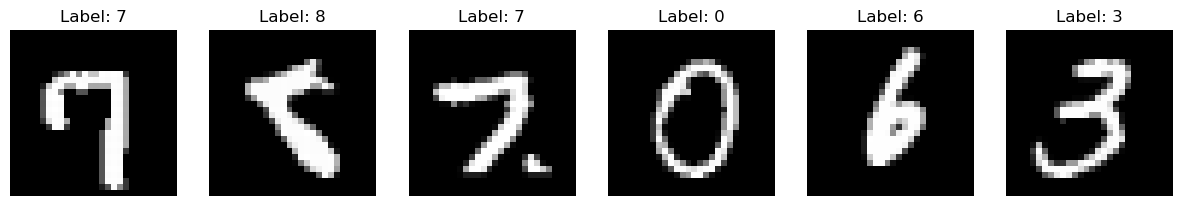

Epoch [3/5], Loss: 0.1872


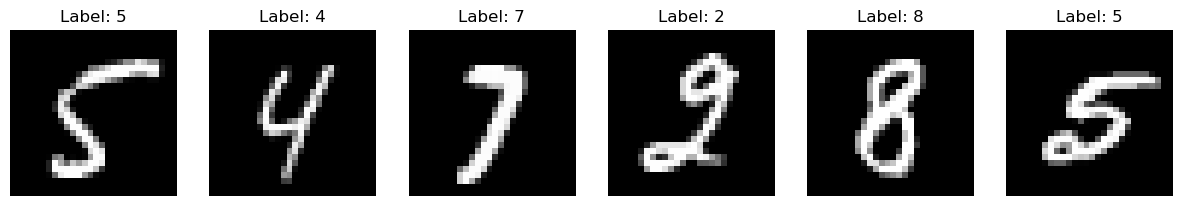

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 하이퍼파라미터 설정
batch_size = 64
learning_rate = 0.001
num_epochs = 5

# 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 간단한 신경망 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleNN()

# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습
for epoch in range(num_epochs):
    model.train() # 훈련 모드
    for i, (images, labels) in enumerate(train_loader):
        # 예측
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i == 0:
            fig, axs = plt.subplots(1, 6, figsize=(15, 3))
            for j in range(6):
                img = images[j].squeeze().numpy()
                axs[j].imshow(img, cmap='gray')
                axs[j].set_title(f'Label: {labels[j].item()}')
                axs[j].axis('off')
            plt.show()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
print("Test\n") 

# 모델 평가 및 예측 시각화
model.eval() # 평가 모드
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if i == 0:
            fig, axs = plt.subplots(1, 6, figsize=(15, 3))
            for j in range(6):
                img = images[j].squeeze().numpy()
                axs[j].imshow(img, cmap='gray')
                axs[j].set_title(f'Label: {labels[j].item()}')
                axs[j].axis('off')
            plt.show()

print(f'Test Accuracy: {100 * correct / total:.2f}%')